# Access and Plot measurements

The following code shows how to load and plot measurements of a LinearAccelerationSeries and a GPSSeries.

In [4]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy import signal

import pyridy

from pyridy.utils import AccelerationSeries, LinearAccelerationSeries, NTPDatetimeSeries, GyroSeries, GPSSeries, MagnetometerSeries # Every data series that should be used should be imported here


The argument download_osm_data tries to download additional OSM which includes:
railway track data, railway lines, position of level crossings and switches. Sometimes the Overpass API which is used to access the data can be overloaded leading to an error.

In [7]:
path = "../ridy_data"
# Load only some timeseries
campaign = pyridy.Campaign(folder=path,sync_method="ntp_time", download_osm_data=True, railway_types=["rail"], osm_recurse_type=">")

File Import:   0%|          | 0/2 [00:00<?, ?it/s]

[WinError 10061] No connection could be made because the target machine actively refused it
[WinError 10061] No connection could be made because the target machine actively refused it


Bounding Boxes:   0%|          | 0/1 [00:00<?, ?it/s]

Railway Types:   0%|          | 0/1 [00:00<?, ?it/s]

The following code plots the velocity and linear acceleration of one vehicle over time. Due to the long measurement duration, it can take a few seconds until the plot appears.

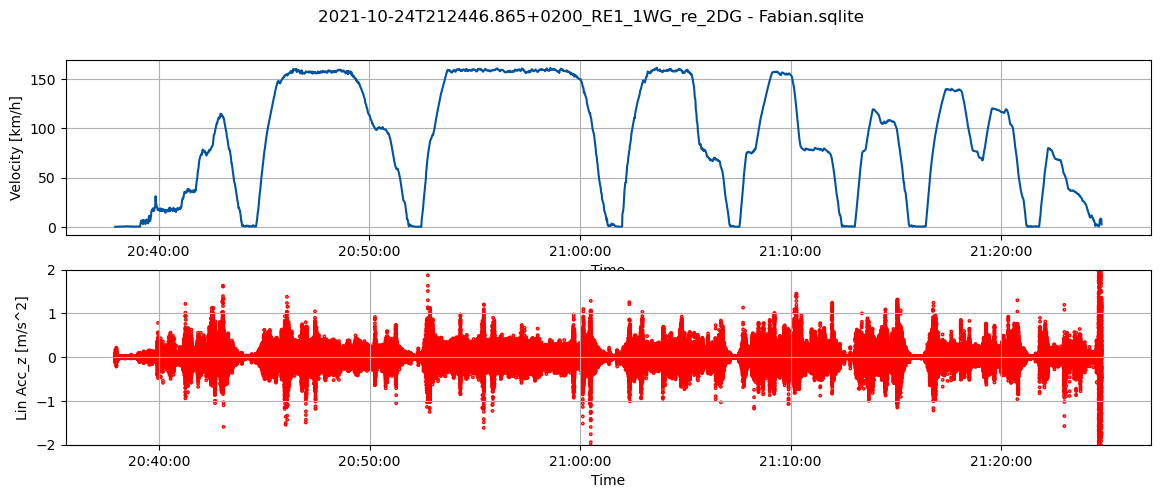

In [8]:
f = campaign[1] # Individual files can either be accessed over indices or by calling the campaign with the file name campaign("NAME_OF_THE_FILE")

fig, ax = plt.subplots(2, 1, sharex="row", figsize=(14, 5))

# Upper plot showing vehicle speed
ax[0].plot(f.measurements[GPSSeries].time, f.measurements[GPSSeries].speed*3.6)  # Note that individual data series can be accessed using their classes which have to be imported before
ax[0].grid()
ax[0].set_ylabel("Velocity [km/h]")
ax[0].set_xlabel("Time")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Lower plot showing vehicle vertical acceleration
ax[1].scatter(f.measurements[LinearAccelerationSeries].time, f.measurements[LinearAccelerationSeries].lin_acc_z, facecolors='none', edgecolors='r',s=3)
ax[1].grid()
ax[1].set_ylabel("Lin Acc_z [m/s^2]")
ax[1].set_xlabel("Time")
ax[1].set_ylim(-2, 2)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))


plt.suptitle(f.filename)
plt.show()